# Subject: Data Science Foundation

## Session 9 - Data Exploration and Imputation

### Exercise 1 -  Data Exploration and Imputation for pandas Dataframe "Bike sharing"


## 1. Import the data set "Bike sharing"

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("/Users/roman2006/PycharmProjects/BTS /Classes Gits/BTS_DataScienceFoundations/Session_9_DSF/FileData/2_bike_sharing.csv")
df.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 2. Are there NA Values, Outliers or Other Strange Values? Explore the variable "temp".

In [60]:
df.shape

(10886, 12)

In [61]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [62]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10289.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.357901,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.617266,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [63]:
df['temp'].describe()

count    10289.000000
mean        20.357901
std          7.617266
min          0.820000
25%         13.940000
50%         20.500000
75%         26.240000
max         41.000000
Name: temp, dtype: float64

In [64]:
df.isnull().sum()

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp          597
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114986fd0>]], dtype=object)

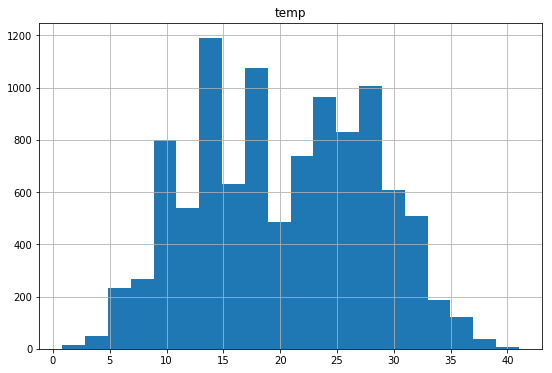

In [65]:
df.hist(column='temp',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)   

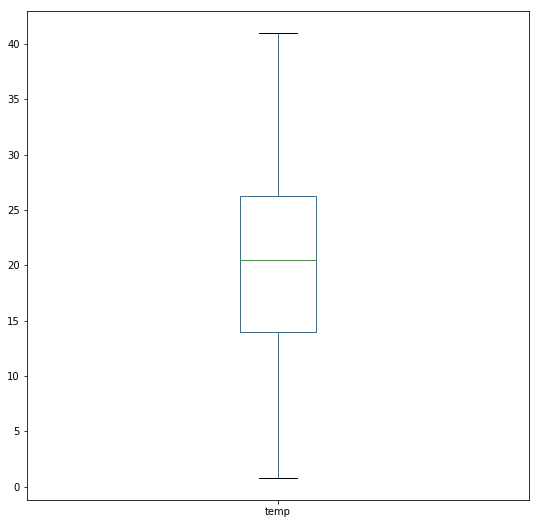

In [66]:
df["temp"].plot(kind="box",
                           figsize=(9,9))

## OK, so there are around 500 temperature values missing and there are no real outliers, the problem is that depending on the season there could be different median temperatures wich we can add, the other solution would be to average the temperature of the hour before and after supposing the missing values are not all on the same date.

In [67]:
df.temp = df.temp.fillna((df.temp.shift() + df.temp.shift(-1))/2)
df.isnull().sum()
df.temp = df.temp.fillna((df.temp.shift() + df.temp.shift(-1))/2)

In [68]:
df.isnull().sum()

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp          593
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
dtype: int64

## In this case we can see that most missing values are complete days so we have to take another approach, like filling with the previous known value 

In [95]:
df.fillna(method='ffill', inplace=True)

In [96]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64